# 2章: 確率的プログラミング: コンピュータの助けを借りる

必要なモジュールの読み込み

In [3]:
import os
import numpy as np
from matplotlib import pyplot as plt
from cmdstanpy import CmdStanModel
import arviz as az
az.style.use("arviz-darkgrid")
np.random.seed(0)

script_dir = os.path.dirname('chapter2.ipynb')

### 統計モデルの記述とサンプリングの実行

In [4]:
N = 40  # アリスのデザインA案の表示数
a = 2   # アリスのデザインA案のクリック数

file_path = os.path.join(script_dir, 'model.stan')
model = CmdStanModel(stan_file=file_path)

data = {'N': N, 'a': a}

fit = model.sample(
  data=data,
  chains=2,
  seed=0,
  iter_warmup=1000,
  iter_sampling=5000
)


00:45:52 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed


00:45:52 - cmdstanpy - INFO - CmdStan done processing.


In [5]:
cmdstanpy_data = az.from_cmdstanpy(
    posterior=fit,
    log_likelihood="lp__",
)

In [6]:
print(fit.diagnose())

Processing csv files: /var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmptyt_wz1r/modelw3wc81lp/model-20230522004552_1.csv, /var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmptyt_wz1r/modelw3wc81lp/model-20230522004552_2.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

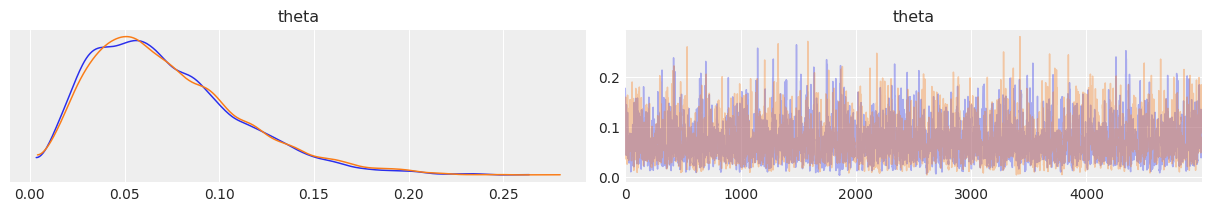

In [7]:
az.plot_trace(cmdstanpy_data.posterior, compact=False) # 事後分布からのサンプルの可視化

In [8]:
fit.summary() # 事後分布の要約統計量

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
lp__,-11.3442,0.013559,0.734594,-12.873100,-11.054300,-10.809500,2935.05,31224.0,1.00067
theta,0.0719,0.000727,0.039869,0.020396,0.064815,0.146767,3007.14,31990.9,1.00019


CmdStanPyによって推論された，アリスのデザインA案のクリック率の事後分布

<Axes: title={'center': 'theta'}>

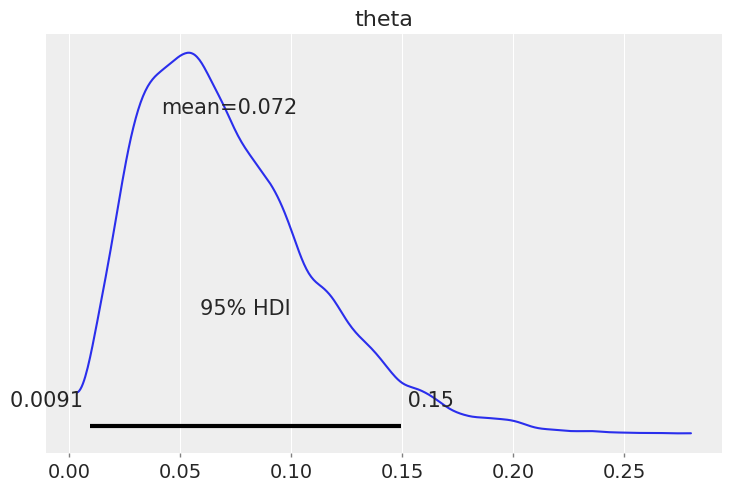

In [9]:
az.plot_posterior(cmdstanpy_data.posterior,hdi_prob=0.95) # 事後分布の可視化

In [10]:
theta_samples = fit.stan_variable('theta')

print((theta_samples - 0.01 > 0).mean())

0.9938


In [11]:
N_a = 40  # アリスのデザインA案の表示数
a = 2   # アリスのデザインA案のクリック数
N_b = 50  # アリスのデザインB案の表示数
b = 4   # アリスのデザインB案のクリック数

file_path = os.path.join(script_dir, 'model_2.stan')
model = CmdStanModel(stan_file=file_path)

data = {'N_a': N_a, 'N_b': N_b, 'a': a, 'b': b}

fit = model.sample(
  data=data,
  chains=2,
  seed=0,
  iter_warmup=1000,
  iter_sampling=5000,
  show_progress=True
)


00:45:57 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed


00:45:57 - cmdstanpy - INFO - CmdStan done processing.


In [12]:
cmdstanpy_data = az.from_cmdstanpy(
    posterior=fit,
    log_likelihood="lp__",
)

In [13]:
cmdstanpy_data.posterior


<xarray.Dataset>
Dimensions:      (chain: 2, draw: 5000, theta_dim_0: 2)
Coordinates:
  * chain        (chain) int64 0 1
  * draw         (draw) int64 0 1 2 3 4 5 6 ... 4994 4995 4996 4997 4998 4999
  * theta_dim_0  (theta_dim_0) int64 0 1
Data variables:
    theta        (chain, draw, theta_dim_0) float64 0.05047 0.05568 ... 0.07164
Attributes:
    created_at:                 2023-05-21T15:45:57.533276
    arviz_version:              0.15.1
    inference_library:          cmdstanpy
    inference_library_version:  1.1.0

In [14]:
print(fit.diagnose())

Processing csv files: /var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmptyt_wz1r/model_2ltv64m5e/model_2-20230522004557_1.csv, /var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmptyt_wz1r/model_2ltv64m5e/model_2-20230522004557_2.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



アリスのデザイン案AおよびBのクリック率のサンプルの可視化

array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

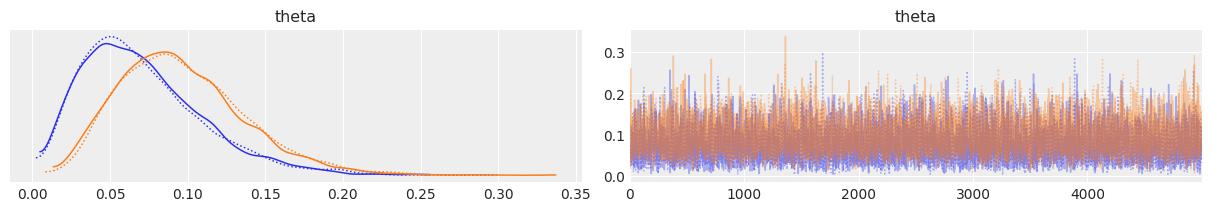

In [15]:
az.plot_trace(cmdstanpy_data.posterior, compact=True) # 事後分布からのサンプルの可視化

In [16]:
theta_samples = fit.stan_variable('theta')

print((theta_samples[:, 1] - theta_samples[:, 0] > 0).mean())

0.6902


In [17]:
N_a = 1280  # ボブのデザインA案の表示数
a = 64   # ボブのデザインA案のクリック数
N_b = 1600  # ボブのデザインB案の表示数
b = 128   # ボブのデザインB案のクリック数

file_path = os.path.join(script_dir, 'model_2.stan')
model = CmdStanModel(stan_file=file_path)

data = {'N_a': N_a, 'N_b': N_b, 'a': a, 'b': b}

fit = model.sample(
  data=data,
  chains=2,
  seed=0,
  iter_warmup=1000,
  iter_sampling=5000,
  show_progress=True
)

cmdstanpy_data = az.from_cmdstanpy(
    posterior=fit,
    log_likelihood="lp__",
)

print(fit.diagnose())

00:45:58 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed


00:45:58 - cmdstanpy - INFO - CmdStan done processing.



Processing csv files: /var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmptyt_wz1r/model_2ve29jtc5/model_2-20230522004558_1.csv, /var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmptyt_wz1r/model_2ve29jtc5/model_2-20230522004558_2.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

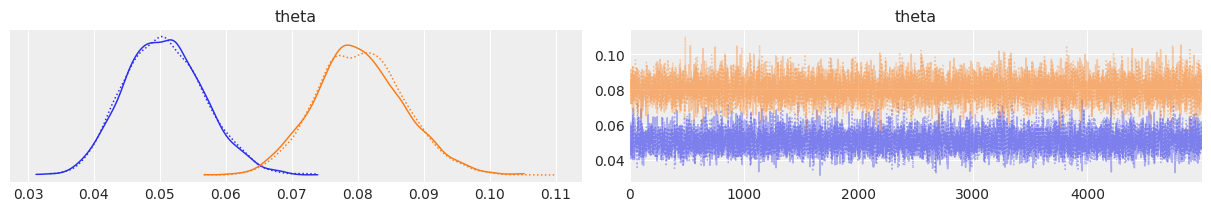

In [18]:
az.plot_trace(cmdstanpy_data.posterior, compact=True) # 事後分布からのサンプルの可視化

In [19]:
theta_samples = fit.stan_variable('theta')

print((theta_samples[:, 1] - theta_samples[:, 0] > 0).mean())

0.9996


## 真のレビュースコア

In [20]:
n_a = [20, 10, 36, 91, 170]
data = [1 for _ in range(n_a[0])]
data += [2 for _ in range(n_a[1])]
data += [3 for _ in range(n_a[2])]
data += [4 for _ in range(n_a[3])]
data += [5 for _ in range(n_a[4])]
data = np.array(data)

file_path = os.path.join(script_dir, 'model_a.stan')
model = CmdStanModel(stan_file=file_path)

data = {'N': len(data), 'K': 5, 'x': data}

fit = model.sample(
  data=data,
  chains=2,
  seed=0,
  iter_warmup=1000,
  iter_sampling=5000,
  show_progress=True
)

cmdstanpy_data = az.from_cmdstanpy(
    posterior=fit,
    log_likelihood="lp__",
)

print(fit.diagnose())

00:45:59 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       


00:46:00 - cmdstanpy - INFO - CmdStan done processing.



Processing csv files: /var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmptyt_wz1r/model_ate98afl6/model_a-20230522004559_1.csv, /var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmptyt_wz1r/model_ate98afl6/model_a-20230522004559_2.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

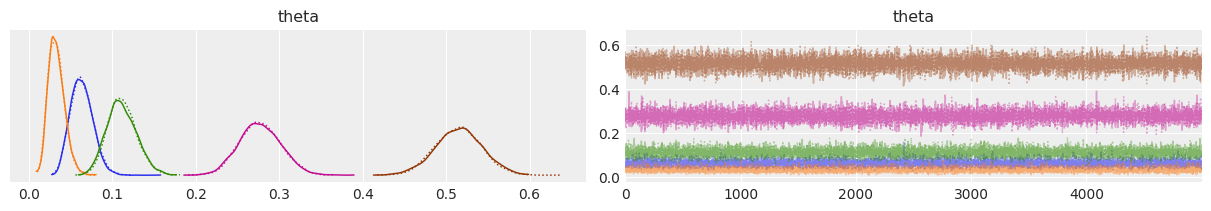

In [21]:
az.plot_trace(cmdstanpy_data.posterior, compact=True) # 事後分布からのサンプルの可視化

商品Aについて各レビュースコアが生み出される確率 $\boldsymbol{\theta}$ の事後分布の可視化

array([[<Axes: title={'center': 'theta\n0'}>,
        <Axes: title={'center': 'theta\n1'}>,
        <Axes: title={'center': 'theta\n2'}>],
       [<Axes: title={'center': 'theta\n3'}>,
        <Axes: title={'center': 'theta\n4'}>, <Axes: >]], dtype=object)

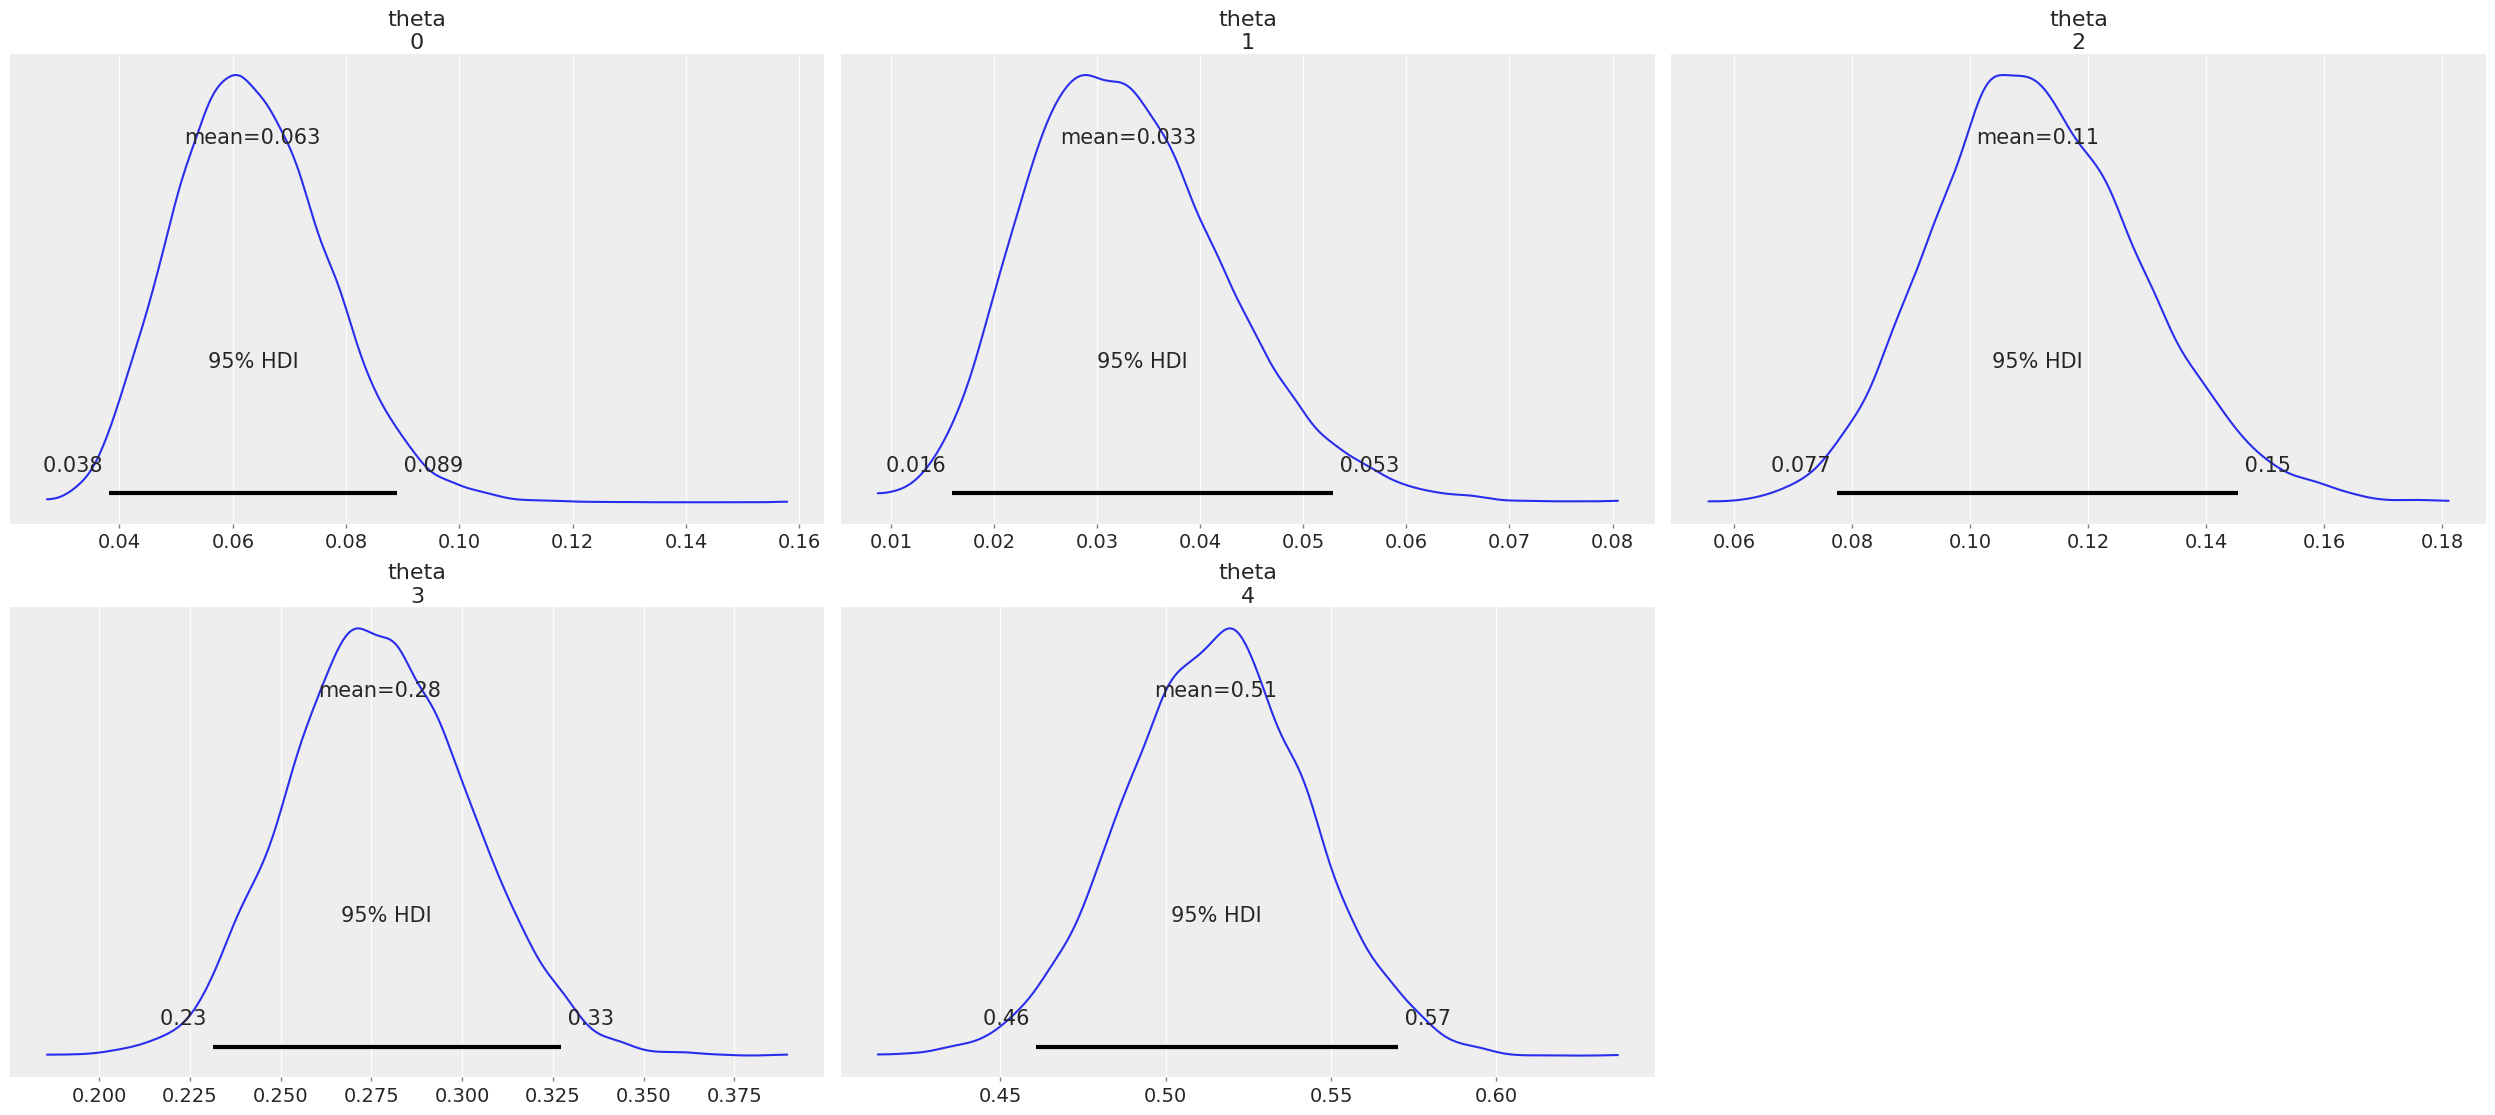

In [22]:
az.plot_posterior(cmdstanpy_data.posterior,hdi_prob=0.95) # 事後分布の可視化

In [23]:
theta_samples = fit.stan_variable('theta')
weights = np.array([1, 2, 3, 4, 5])
m_a = [sum(row * weights) for row in theta_samples]
#m_a = np.matmul(trace_a['theta'], weights)

商品Aに対するレビュースコアの平均点 $m$ の確率密度関数

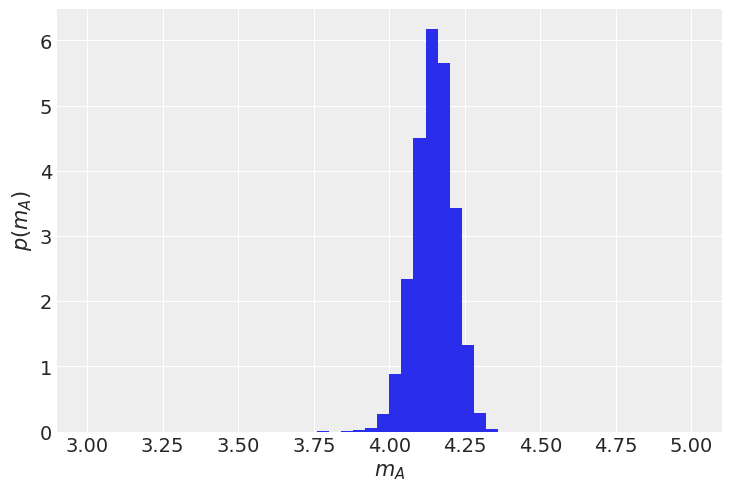

In [24]:
plt.hist(m_a, range=(3, 5), bins=50, density=True)
plt.xlabel(r'$m_A$')
plt.ylabel(r'$p(m_A)$')
plt.show()

商品Bについて各レビュースコアが生み出される確率 $\boldsymbol{\theta}$ のサンプルの可視化

In [25]:
n_b = np.array([0, 0, 4, 0, 6])


file_path = os.path.join(script_dir, 'model_b.stan')
model = CmdStanModel(stan_file=file_path)

data = {'N': n_b.sum(), 'K': 5, 'n_b': n_b}

fit = model.sample(
  data=data,
  chains=2,
  seed=0,
  iter_warmup=1000,
  iter_sampling=5000,
  show_progress=True
)

cmdstanpy_data = az.from_cmdstanpy(
    posterior=fit,
    log_likelihood="lp__",
)

print(fit.diagnose())

00:46:02 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       


00:46:02 - cmdstanpy - INFO - CmdStan done processing.



Processing csv files: /var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmptyt_wz1r/model_by6dmaz2c/model_b-20230522004602_1.csv, /var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmptyt_wz1r/model_by6dmaz2c/model_b-20230522004602_2.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

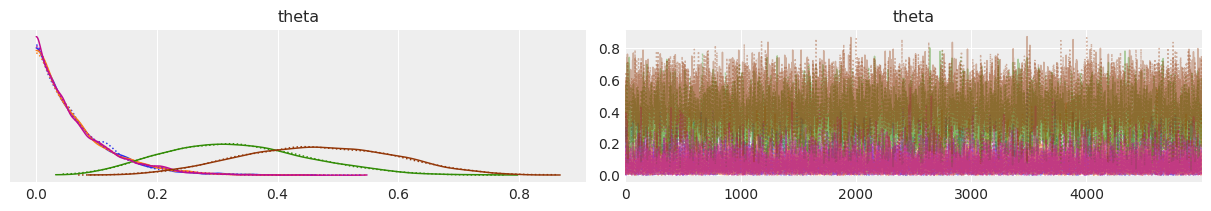

In [26]:
az.plot_trace(cmdstanpy_data.posterior, compact=True) # 事後分布からのサンプルの可視化

商品AとBのレビュースコアの平均点の確率密度関数

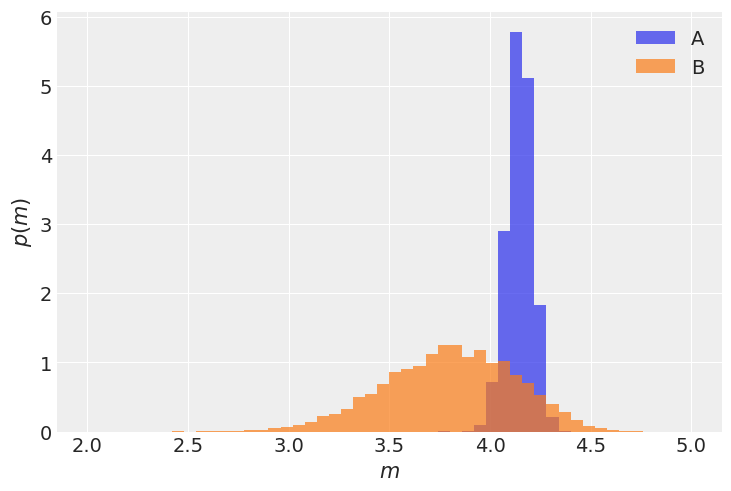

In [27]:
theta_samples = fit.stan_variable('theta')

m_b = [sum(row * weights) for row in theta_samples]
plt.hist(m_a, range=(2, 5), bins=50, density=True, label='A',
         alpha=0.7)
plt.hist(m_b, range=(2, 5), bins=50, density=True, label='B',
         alpha=0.7)
plt.xlabel(r'$m$')
plt.ylabel(r'$p(m)$')
plt.legend()
plt.show()

# 滞在時間をテストする

あるウェブサイトにおける滞在時間（秒）のヒストグラム

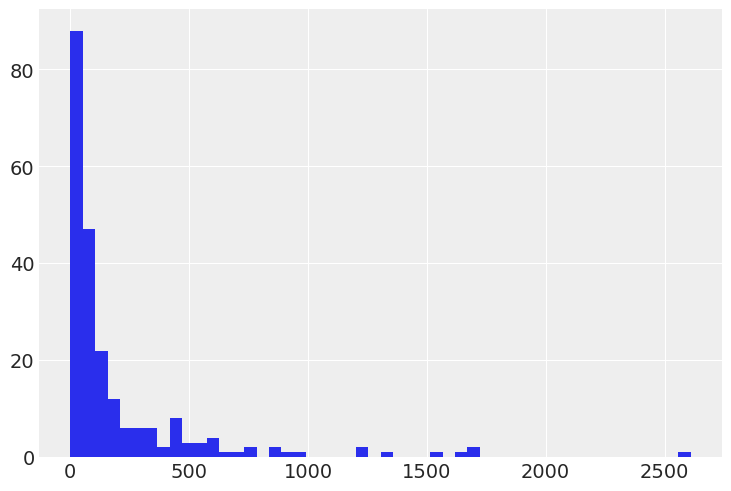

In [28]:
import urllib
url = 'https://www.oreilly.co.jp/pub/9784873119168/data/time-on-page.csv'
response = urllib.request.urlopen(url)
data = [int(row.strip()) for row in response.readlines()]
plt.hist(data, bins=50)
plt.show()

さまざまな指数分布の例

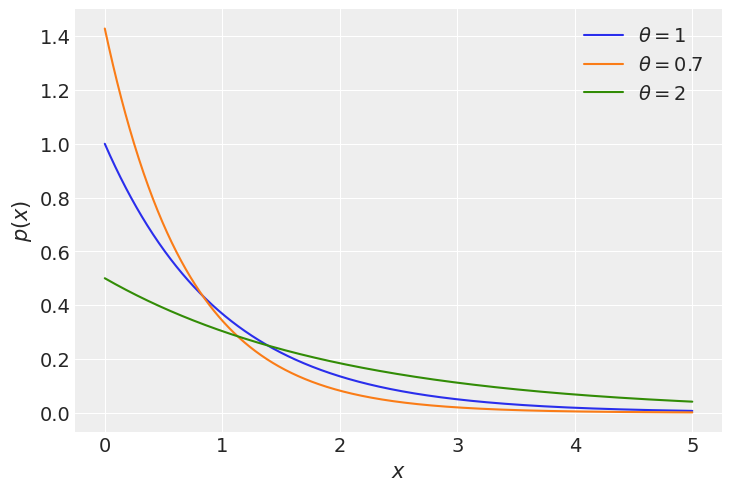

In [29]:
from scipy import stats
xs = np.linspace(0, 5, 1001)
plt.plot(xs, stats.expon.pdf(xs, 0, 1), label=r'$\theta = 1$')
plt.plot(xs, stats.expon.pdf(xs, 0, 0.7), label=r'$\theta = 0.7$')
plt.plot(xs, stats.expon.pdf(xs, 0, 2), label=r'$\theta = 2$')
plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$')
plt.legend()
plt.show()

確率変数 $\theta$ のサンプルの軌跡

In [30]:
file_path = os.path.join(script_dir, 'model_3.stan')
model = CmdStanModel(stan_file=file_path)

data = {'N': len(data), 'obs': np.array(data)}

fit = model.sample(
  data=data,
  chains=2,
  seed=0,
  iter_warmup=1000,
  iter_sampling=5000,
  show_progress=True
)

cmdstanpy_data = az.from_cmdstanpy(
    posterior=fit,
    log_likelihood="lp__",
)

print(fit.diagnose())

00:46:06 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       


00:46:06 - cmdstanpy - INFO - CmdStan done processing.
00:46:06 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: exponential_lpdf: Inverse scale parameter is 0, but must be positive finite! (in '/var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmpw42mip6y/tmpp3h071cz.stan', line 12, column 4 to column 34)
	Exception: exponential_lpdf: Inverse scale parameter is 0, but must be positive finite! (in '/var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmpw42mip6y/tmpp3h071cz.stan', line 12, column 4 to column 34)
	Exception: exponential_lpdf: Inverse scale parameter is 0, but must be positive finite! (in '/var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmpw42mip6y/tmpp3h071cz.stan', line 12, column 4 to column 34)
	Exception: exponential_lpdf: Inverse scale parameter is 0, but must be positive finite! (in '/var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmpw42mip6y/tmpp3h071cz.stan', line 12, column 4 to column 34)
	Exception: exponential_lpdf: Inverse scale parameter i


Processing csv files: /var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmptyt_wz1r/model_3g3uk5dy0/model_3-20230522004606_1.csv, /var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmptyt_wz1r/model_3g3uk5dy0/model_3-20230522004606_2.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

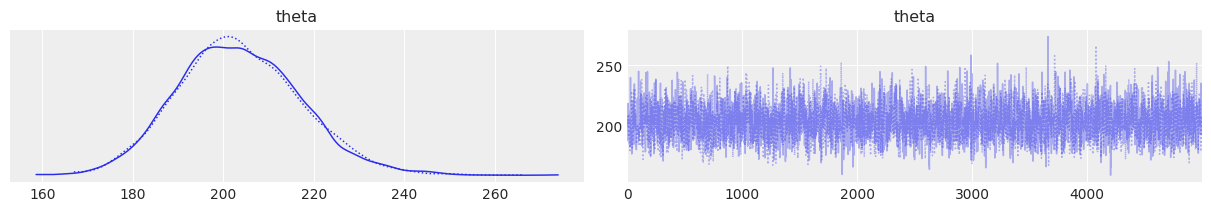

In [31]:
az.plot_trace(cmdstanpy_data.posterior, compact=True) # 事後分布からのサンプルの可視化

確率変数 $\theta$ の事後分布

<Axes: title={'center': 'theta'}>

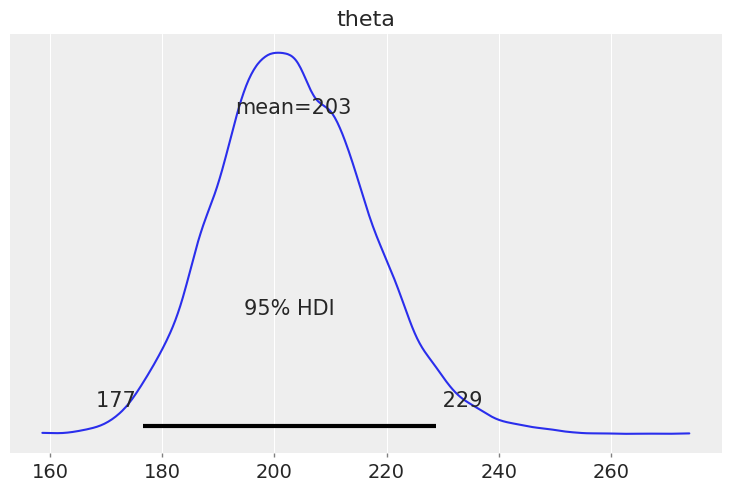

In [32]:
az.plot_posterior(cmdstanpy_data.posterior,hdi_prob=0.95) # 事後分布の可視化

## なぜベイズ推論による統計的仮説検定を行うか

アリスのレポートにおけるクリック数の標本分布。
合計クリック数 $a$ が4以上となる部分を異なる色で示した。

/var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/ipykernel_6948/3755135786.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


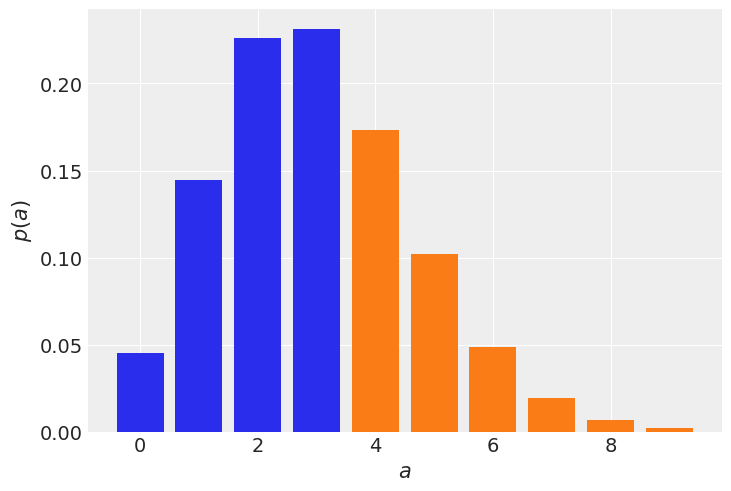

In [33]:
x = 10
N = 50
theta = 0.06
thres = 4
plt.bar(range(thres), stats.binom.pmf(range(thres), N, theta), linewidth=0)
plt.bar(range(thres, x), stats.binom.pmf(range(thres, x), N, theta), linewidth=0)
plt.xlabel(r'$a$')
plt.ylabel(r'$p(a)$')
plt.tight_layout()
plt.show()

$a$ が `thres` 以上の値を取る確率

In [34]:
stats.binom.pmf(range(thres, 10000), N, theta).sum()


0.3526966279036829

ボブのレポートにおけるクリック数の標本分布。合計クリック数 $a$ が128以上となる部分を異なる色で示した。

/var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/ipykernel_6948/3914446970.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


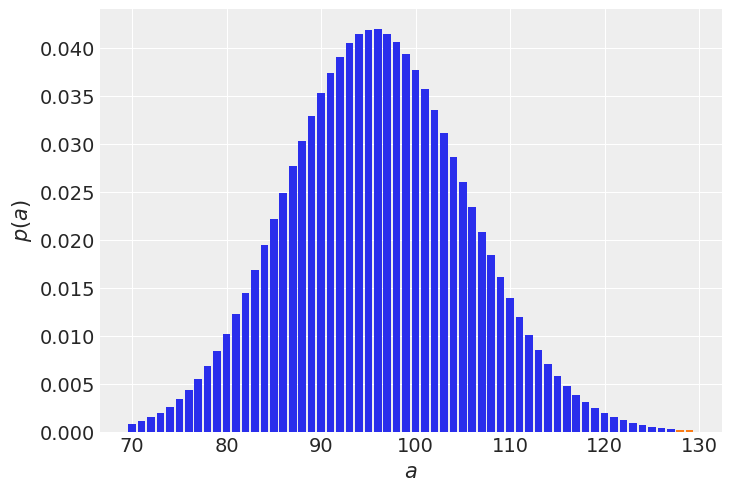

In [35]:
minx = 70
x = 130
N = 1600
theta = 0.06
thres = 128
plt.bar(range(minx, thres), stats.binom.pmf(range(minx, thres), N, theta), linewidth=0)
plt.bar(range(thres, x), stats.binom.pmf(range(thres, x), N, theta), linewidth=0)
plt.xlabel(r'$a$')
plt.ylabel(r'$p(a)$')
plt.tight_layout()
plt.show()

$a$ が `thres` 以上の値を取る確率

In [36]:
stats.binom.pmf(range(thres, 10000), N, theta).sum()

0.0007341521761379299